## Modelagem de tópicos
BERTopic: Neural topic modeling with a class-based TF-IDF procedure: https://arxiv.org/abs/2203.05794

In [ ]:
import pandas as pd
from bertopic import BERTopic
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('dados/id_desc_clr.parquet')
df.shape

(3452, 6)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3452 entries, 0 to 3615
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                3452 non-null   object
 1   desc              3452 non-null   object
 2   desc_sent         3452 non-null   object
 3   desc_token_clr    3452 non-null   object
 4   desc_bigram_clr   3452 non-null   object
 5   desc_trigram_clr  3452 non-null   object
dtypes: object(6)
memory usage: 188.8+ KB


### Bertopic

In [4]:
# Transforma lista de tokens (frases limpas) em string
df['desc_token_clr_str'] = df['desc_token_clr'].apply(lambda tokens: ' '.join(tokens))

In [5]:
docs = df['desc_token_clr_str'].to_list()

model = BERTopic(verbose=True)
topics, probs = model.fit_transform(docs)

Batches: 100%|██████████| 108/108 [03:27<00:00,  1.92s/it]
2023-05-15 22:55:41,538 - BERTopic - Transformed documents to Embeddings
2023-05-15 22:56:27,775 - BERTopic - Reduced dimensionality
2023-05-15 22:56:28,072 - BERTopic - Clustered reduced embeddings


In [6]:
topics = model.get_topic_info()
topics

,Topic,Count,Name
0,-1,867,-1_data_read_platform_company
1,0,1264,0_health_care_healthcare_medical
2,1,276,1_security_data_cloud_risk
3,2,126,2_payments_payment_financial_businesses
4,3,87,3_insurance_claims_underwriting_insurers
5,4,64,4_ai_learning_intelligence_business
6,5,64,5_logistics_freight_fulfillment_shipping
7,6,61,6_retailers_retail_commerce_store
8,7,56,7_training_learning_workforce_workers
9,8,41,8_marketing_customer_data_marketers


#### Principais tokens dos maiores tópicos 

In [7]:
def get_words_topic(id_topic):
    print('Tópico:', topics.loc[id_topic + 1]['Name'])
    words = dict(model.get_topic(id_topic))
    
    wordcloud = WordCloud(width=800, height=600, background_color='white', min_font_size=10) \
                .generate_from_frequencies(words)
    plt.figure(figsize=(4, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Tópico: 0_health_care_healthcare_medical


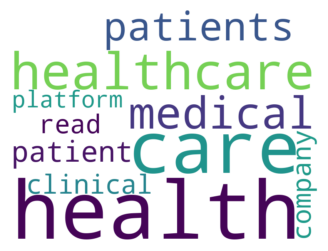

Tópico: 1_security_data_cloud_risk


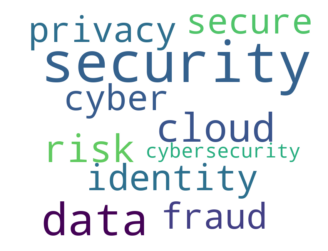

Tópico: 2_payments_payment_financial_businesses


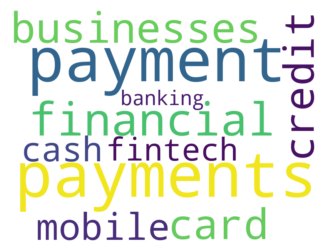

Tópico: 3_insurance_claims_underwriting_insurers


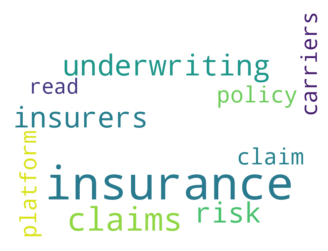

Tópico: 4_ai_learning_intelligence_business


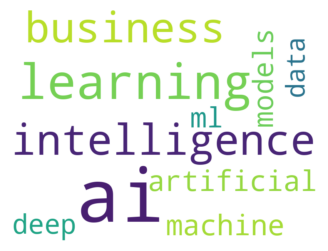

In [9]:
for i in range(0, 5):
    get_words_topic(i)

### Visualização de tópicos

In [10]:
model.visualize_topics()

In [11]:
model.visualize_barchart()

### Exporta descrições e seus tópicos

In [29]:
df_topics = model.get_document_info(docs)
df_topics.head(5)

,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,vectra cybersecurity platform uses ai detect a...,1,1_security_data_cloud_risk,security - data - cloud - risk - identity - cy...,1.000000,False
1,roadzen global leader p c insurance space insu...,3,3_insurance_claims_underwriting_insurers,insurance - claims - underwriting - insurers -...,0.908722,False
2,restream multi streaming solution allows produ...,9,9_video_tv_streaming_radio,video - tv - streaming - radio - onrad - conte...,0.806066,False
3,dlp works 1 companies fortunately cyberhaven 9...,1,1_security_data_cloud_risk,security - data - cloud - risk - identity - cy...,1.000000,False
4,shift technology delivers ai native decision a...,3,3_insurance_claims_underwriting_insurers,insurance - claims - underwriting - insurers -...,1.000000,False


In [30]:
# Adicona a coluna com a descrição sem tratamentos
df_topics = df_topics.set_index(df.index)
df_topics['desc'] = df['desc']

In [33]:
df_topics.to_parquet('dados/desc_topics.parquet')